# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

271

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=c55e1c9f1c3f28bab994931b713e9682&units=imperial&q='

In [4]:
city_two=[]
cloudiness=[]
country =[]
date =[]
humidity=[]
lat=[]
lon=[]
temp_max=[]
temp_min=[]
wind_speed=[]

x=0
y=1

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        temp_min.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        
        if x > 500:
            x=1
            y+=1
            city_two.append(city)
        else:
            x+=1
            city_two.append(city)
            print(f"Processing Record {x} of Set {y} | {city}")
    except:
        print("city not found")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")
print(response)

Processing Record 1 of Set 1 | salalah
Processing Record 2 of Set 1 | paramonga
city not found
Processing Record 3 of Set 1 | port moresby
Processing Record 4 of Set 1 | parthenay
Processing Record 5 of Set 1 | baiyin
Processing Record 6 of Set 1 | oriximina
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | rtishchevo
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | harrisburg
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | albany
Processing Record 24 of Set 

Processing Record 187 of Set 1 | bayir
Processing Record 188 of Set 1 | carnarvon
city not found
Processing Record 189 of Set 1 | kuching
Processing Record 190 of Set 1 | portobelo
Processing Record 191 of Set 1 | tigil
Processing Record 192 of Set 1 | kavieng
Processing Record 193 of Set 1 | kumluca
Processing Record 194 of Set 1 | saskylakh
Processing Record 195 of Set 1 | sokoni
city not found
Processing Record 196 of Set 1 | san cristobal
Processing Record 197 of Set 1 | nishihara
city not found
Processing Record 198 of Set 1 | cotonou
Processing Record 199 of Set 1 | sitka
Processing Record 200 of Set 1 | soyo
Processing Record 201 of Set 1 | kalininsk
Processing Record 202 of Set 1 | parakan
Processing Record 203 of Set 1 | rorvik
Processing Record 204 of Set 1 | cherskiy
Processing Record 205 of Set 1 | grindavik
city not found
Processing Record 206 of Set 1 | sinnar
Processing Record 207 of Set 1 | atar
Processing Record 208 of Set 1 | bredasdorp
city not found
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({'cities':city_two,
                        'cloudiness':cloudiness,
                        'country':country,
                        'date':date,
                        'humidity':humidity,
                        'lat':lat,
                        'lon':lon,
                        'temp_max':temp_max,
                        'temp_min':temp_min,
                        'wind_speed':wind_speed})

city_df.to_csv(output_data_file,index=False)
city_df

,cities,cloudiness,country,date,humidity,lat,lon,temp_max,temp_min,wind_speed
0,salalah,75,OM,1578278765,78,17.01,54.10,75.20,75.20,3.36
1,paramonga,82,PE,1578278765,89,-10.68,-77.82,68.95,68.95,10.45
2,port moresby,99,CD,1578278765,67,-7.04,29.76,75.81,75.81,6.13
3,parthenay,0,FR,1578278765,93,46.65,-0.25,36.00,34.00,5.82
4,baiyin,90,CN,1578278765,85,36.55,104.13,30.00,19.40,6.71
...,...,...,...,...,...,...,...,...,...,...
233,dukat,0,AL,1578278782,35,40.25,19.57,44.01,44.01,3.00
234,isangel,76,VU,1578278782,75,-19.55,169.27,78.17,78.17,9.08
235,bitkine,9,TD,1578278782,28,11.98,18.21,63.50,63.50,7.90
236,tupancireta,0,BR,1578278653,72,-29.08,-53.84,68.45,68.45,5.59


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(-60, 80)

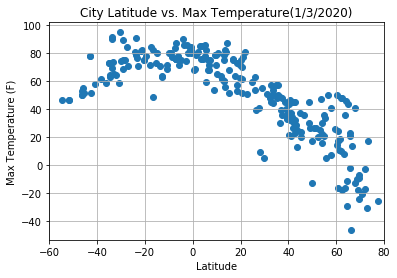

In [6]:
plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature(1/3/2020)")
plt.xlim(-60,80)

#### Latitude vs. Humidity Plot

(-60, 80)

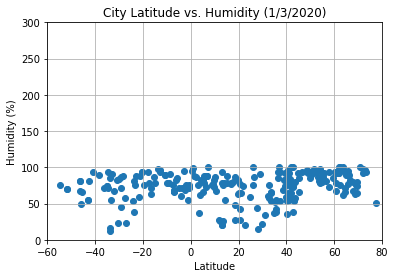

In [7]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,300)
plt.xlim(-60,80)

#### Latitude vs. Cloudiness Plot

(-60, 80)

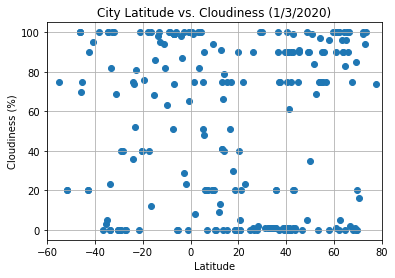

In [8]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (1/3/2020)")
plt.ylim(-5,105)
plt.xlim(-60,80)

#### Latitude vs. Wind Speed Plot

(-60, 80)

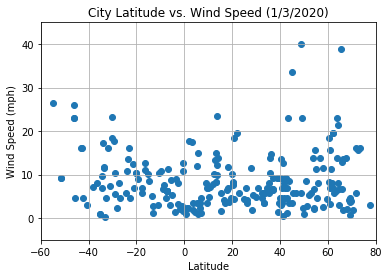

In [9]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(-60,80)

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[(city_df["lat"]>0)]
south_df = city_df.loc[(city_df["lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

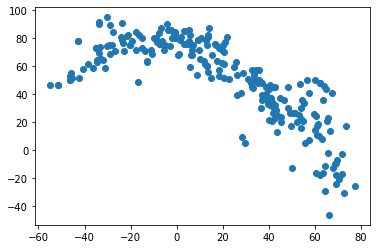

In [18]:
x_axis= np.array([(city_df["lat"])])
y_axis = np.array([(city_df["temp_max"])])

#linreg=LinearRegression()
#x_axis=x_axis.reshape(-1,1)

#linreg.fit(x_axis,y_axis)
#y_pred = linreg.predict(x_axis)
#plt.xlim(0,80)

plt.scatter(x_axis,y_axis)
#plt.plot(x_axis, y_pred, color="red")
plt.show()

#print(linreg.coef_)
#print(linreg.intercept_)


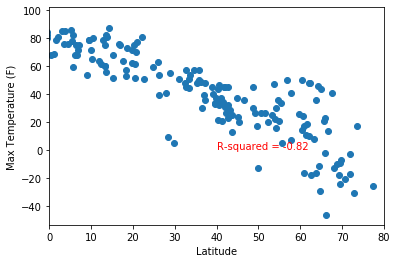

In [19]:
x= np.array



plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(0,80)

linregress
r_squared = -0.8151657406810827
plt.text(40, 0.5, 'R-squared = %0.2f' % r_squared, color="red")
plt.show()

The r-squared is: -0.8151657406810827


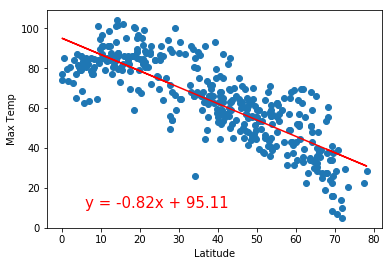

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(-60, 0)

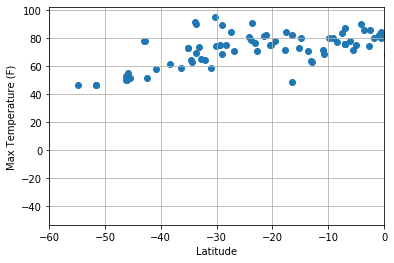

In [20]:
plt.scatter(city_df["lat"],city_df["temp_max"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,0)

The r-squared is: 0.760263355051646


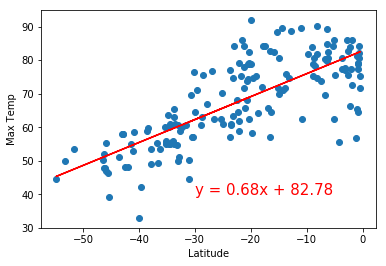

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(0, 80)

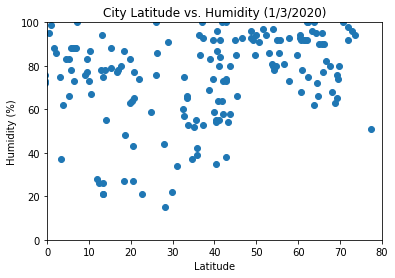

In [22]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,100)
plt.xlim(0,80)

The r-squared is: 0.10358336015746494


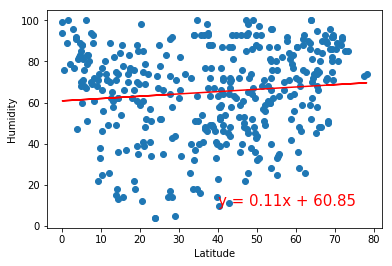

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-60, 0)

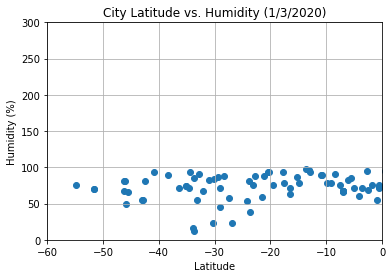

In [23]:
plt.scatter(city_df["lat"],city_df["humidity"], marker="o")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/3/2020)")
plt.ylim(0,300)
plt.xlim(-60,0)

The r-squared is: 0.14689473425583055


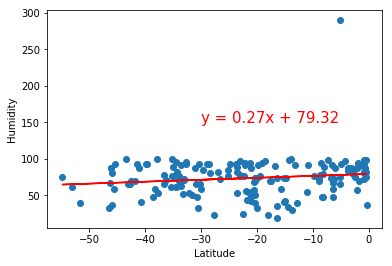

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(0, 80)

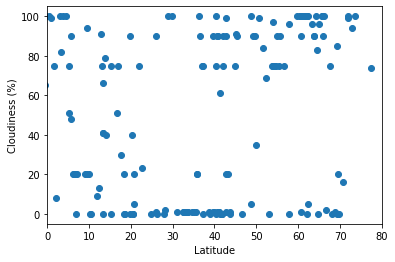

In [24]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.xlim(0,80)

The r-squared is: -0.08733547918934018


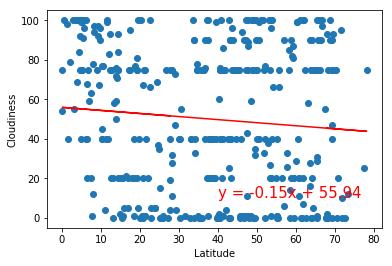

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(-60, 0)

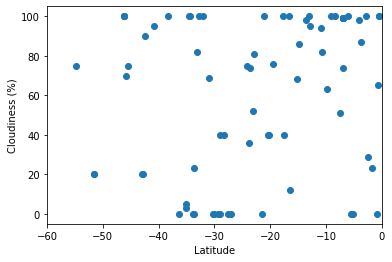

In [25]:
plt.scatter(city_df["lat"],city_df["cloudiness"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.xlim(-60,0)

The r-squared is: 0.21881426893991618


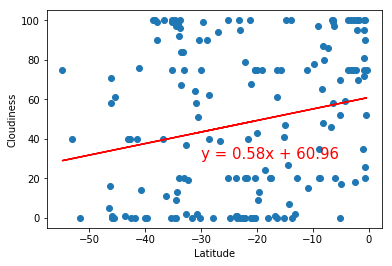

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(0, 80)

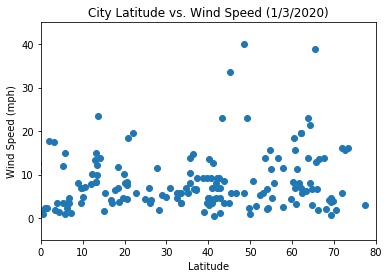

In [26]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(0,80)

The r-squared is: 0.1071382774388479


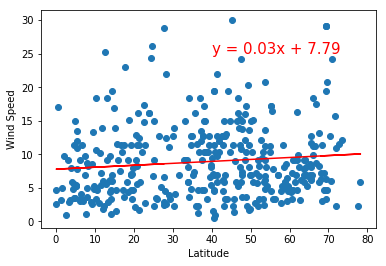

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(-60, 0)

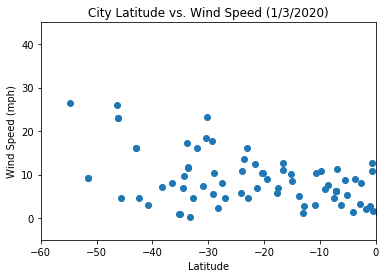

In [27]:
plt.scatter(city_df["lat"],city_df["wind_speed"], marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/3/2020)")
plt.ylim(-5,45)
plt.xlim(-60,0)

The r-squared is: -0.322483077139538


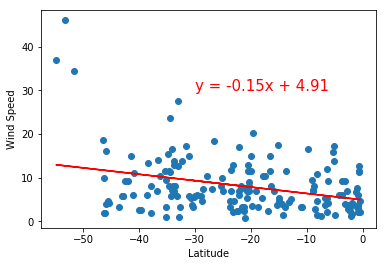